In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston 
boston=load_boston()

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data=boston['data'] # =boston.data
label=boston.target 
columns=boston.feature_names

In [5]:
data=pd.DataFrame(data,columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.shape

(506, 13)

In [7]:
#simpe linear regression 

from sklearn.model_selection import train_test_split 
X_train,X_test, y_train,y_test=train_test_split(data,label,test_size=0.2,
                                                random_state=2022)

In [8]:
X_train['RM']

256    7.454
288    6.315
318    6.382
136    5.942
233    8.247
       ...  
177    6.315
112    5.913
173    6.416
220    6.951
381    6.545
Name: RM, Length: 404, dtype: float64

In [9]:
X_train['RM'].values

array([7.454, 6.315, 6.382, 5.942, 8.247, 6.604, 5.414, 7.148, 6.525,
       6.38 , 5.683, 5.871, 6.8  , 6.162, 6.101, 6.122, 6.12 , 7.041,
       7.765, 6.606, 6.631, 6.012, 6.781, 5.927, 6.152, 6.376, 6.749,
       6.301, 5.88 , 6.174, 5.856, 6.333, 6.415, 7.61 , 6.182, 5.935,
       6.86 , 6.461, 7.691, 7.686, 6.826, 5.888, 5.277, 6.556, 5.99 ,
       6.824, 6.142, 5.895, 6.219, 7.024, 8.704, 6.216, 8.259, 6.031,
       6.728, 6.286, 7.274, 6.358, 6.153, 6.144, 5.565, 5.949, 6.474,
       7.393, 6.326, 5.987, 6.975, 6.727, 6.421, 5.747, 5.762, 3.863,
       6.047, 6.437, 6.202, 7.287, 6.108, 5.468, 5.869, 6.395, 6.02 ,
       5.663, 6.245, 6.066, 6.164, 4.973, 7.185, 6.482, 6.595, 5.879,
       6.405, 6.009, 6.417, 5.878, 5.713, 6.655, 5.822, 6.431, 6.563,
       6.03 , 5.854, 5.936, 7.163, 6.24 , 6.727, 6.433, 6.015, 5.594,
       6.319, 6.453, 5.983, 6.373, 7.236, 6.976, 7.412, 6.438, 6.14 ,
       6.112, 6.625, 5.813, 5.807, 6.113, 6.251, 6.037, 6.739, 5.57 ,
       6.114, 6.021,

In [10]:
#understanding -1,1

X_train['RM'].values.reshape((-1,1))[:5] #-1>> the last index of the value 


array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

sklearn can only read in 2D >>>

[10,20,30]>> cannot read

[[10],
[20],
[30]] >> can read

In [11]:
from sklearn.linear_model import LinearRegression
sim_lr=LinearRegression()

In [12]:
sim_lr.fit(X_train['RM'].values.reshape((-1,1)),y_train)

LinearRegression()

In [13]:
#prediction using room
y_pred=sim_lr.predict(X_test['RM'].values.reshape((-1,1)))


In [14]:
#analysing result

from sklearn.metrics import r2_score
print('simple linear regression,R2:{:.4f}'.format(r2_score(y_test,y_pred))) #.4f >>
#to a float value to the 4th decimal to the nearest value .....':' means to ALL the 
#value

simple linear regression,R2:0.2121


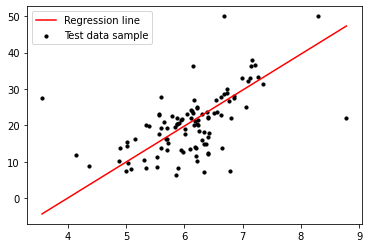

In [15]:
#visualizing result

line_x=np.linspace(min(X_test['RM']),np.max(X_test['RM']),10)
line_y=sim_lr.predict(line_x.reshape((-1,1)))

plt.scatter(X_test['RM'],y_test,s=10,c='black')
plt.plot(line_x,line_y,c='red')
plt.legend(['Regression line','Test data sample'],loc='upper left')

In [16]:
#Mutliple linear regression 

#improving the accuracy and precision

mul_lr=LinearRegression()
mul_lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=mul_lr.predict(X_test)

In [18]:
print('Multiple Linear regression,R2:{:.4f}'.format(r2_score(y_test,y_pred)))

Multiple Linear regression,R2:0.6226


In [19]:
x=np.array([10,20,30])
x.shape

(3,)

In [20]:
x.reshape(3,1)  #the arry has to be in the 2D form like the result below

array([[10],
       [20],
       [30]])

In [21]:
x.reshape(-1,1) #-1,1 >> from the last index to the first index

array([[10],
       [20],
       [30]])

In [22]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr=DecisionTreeRegressor(max_depth=4)

In [23]:
dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=4)

In [24]:
y_pred=dt_regr.predict(X_test['RM'].values.reshape((-1,1)))

In [25]:
print('simpe decision tree regressor, R2:{:.4f}'.format(r2_score(y_test,y_pred)))

simpe decision tree regressor, R2:0.3816


In [26]:
arr=np.arange(1,10)
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
for depth in arr:
  dt_regr=DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred=dt_regr.predict(X_test['RM'].values.reshape((-1,1)))
  print('\n simpe decision tree regressor,depth={}, R2:{:.4f}'.format(depth, r2_score(y_test,y_pred)))



 simpe decision tree regressor,depth=1, R2:0.2459

 simpe decision tree regressor,depth=2, R2:0.3547

 simpe decision tree regressor,depth=3, R2:0.3931

 simpe decision tree regressor,depth=4, R2:0.3816

 simpe decision tree regressor,depth=5, R2:0.3247

 simpe decision tree regressor,depth=6, R2:0.3474

 simpe decision tree regressor,depth=7, R2:0.3164

 simpe decision tree regressor,depth=8, R2:0.3368

 simpe decision tree regressor,depth=9, R2:0.3098


In [28]:
best_depth=0
best_r2=0

for depth in arr:
  dt_regr=DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred=dt_regr.predict(X_test['RM'].values.reshape((-1,1)))

  temp_r2=r2_score(y_test,y_pred)
  print('\n simpe decision tree regressor,depth={}, R2:{:.4f}'.format(depth,temp_r2))

  if best_r2<temp_r2:
    best_depth=depth
    best_r2=temp_r2

  print('the best result is depth={} r2={:.4f}'.format(best_depth,best_r2))


 simpe decision tree regressor,depth=1, R2:0.2459
the best result is depth=1 r2=0.2459

 simpe decision tree regressor,depth=2, R2:0.3547
the best result is depth=2 r2=0.3547

 simpe decision tree regressor,depth=3, R2:0.3931
the best result is depth=3 r2=0.3931

 simpe decision tree regressor,depth=4, R2:0.3816
the best result is depth=3 r2=0.3931

 simpe decision tree regressor,depth=5, R2:0.3247
the best result is depth=3 r2=0.3931

 simpe decision tree regressor,depth=6, R2:0.3474
the best result is depth=3 r2=0.3931

 simpe decision tree regressor,depth=7, R2:0.3164
the best result is depth=3 r2=0.3931

 simpe decision tree regressor,depth=8, R2:0.3368
the best result is depth=3 r2=0.3931

 simpe decision tree regressor,depth=9, R2:0.3098
the best result is depth=3 r2=0.3931


In [29]:
dt_regr=DecisionTreeRegressor(max_depth=8)
dt_regr.fit(X_train,y_train)

y_pred=dt_regr.predict(X_test)
print('Multiple Decision Tree R2:{:4f}'.format(r2_score(y_test,y_pred)))

Multiple Decision Tree R2:0.724477


In [30]:
#Support Vector machine regressor
from sklearn.svm import SVR
svm_regr=SVR(C=4)

svm_regr.fit(X_train['RM'].values.reshape(-1,1),y_train)
y_pred=svm_regr.predict(X_test['RM'].values.reshape(-1,1))

print('Simple support vector machine regressor R2:{:.4f}'.format(r2_score(y_test,y_pred)))

Simple support vector machine regressor R2:0.4139


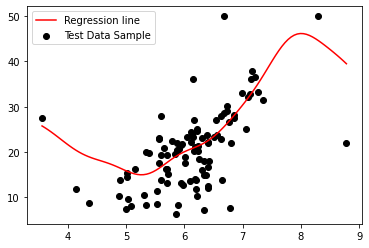

In [31]:
#Visualising the result

line_x=np.linspace(np.min(X_test['RM']),np.max(X_test['RM']),100)
line_y=svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'],y_test,c='black')
plt.plot(line_x,line_y,c='red')
plt.legend(['Regression line','Test Data Sample'],loc='upper left')

In [32]:
svm_regr=SVR(C=20)
svm_regr.fit(X_train,y_train)
y_pred=svm_regr.predict(X_test)

print('Simple support vector machine regressor R2:{:.4f}'.format(r2_score(y_test,y_pred)))

Simple support vector machine regressor R2:0.4234


In [34]:
arr=np.arange(10000,25000)
arr

best_C=0
best_r2=0

for C in arr:
  svm_regr=SVR(C=C)
  svm_regr.fit(X_train,y_train)
  y_pred=svm_regr.predict(X_test)

  print('Simple support vector machine regressor R2:{:.4f}'.format(r2_score(y_test,y_pred)))

  if best_r2<temp_r2:
    best_C=C
    best_r2=temp_r2

  print('the best result is C={} r2={:.4f}'.format(best_C,best_r2))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple support vector machine regressor R2:0.7332
the best result is depth=9 r2=0.3098
Simple 

In [35]:
#Multi Layer Preceptron Regressor (MLPR)

from sklearn.neural_network import MLPRegressor
mlp_regr=MLPRegressor(solver='adam',hidden_layer_sizes=300,max_iter=200)#lbfg,adam,sgd

mlp_regr.fit(X_train,y_train)
y_pred=mlp_regr.predict(X_test)

print('MLPR, R2: {:.4f}'.format(r2_score(y_test,y_pred)))

MLPR, R2: -0.0675
